In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import StringIO
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline

# Phase 1

In [167]:
#Read CSV file from the url to DataFrame
url = "https://github.com/Brunel-Visualization/Brunel/raw/master/python/examples/data/whiskey.csv"
s = requests.get(url).text
wk = pd.read_csv(StringIO(s))

In [168]:
wk.head()

,Name,Rating,Country,Category,Price,ABV,Age,Brand
0,Canadian Hunter Canadian Whisky,40.0,Canada,Blended,9.0,40.0,NaN,Canadian Hunter
1,Canadian LTD Blended Canadian Whiskey,43.0,Canada,Blended,10.0,NaN,NaN,Canadian LTD
2,Kellan Irish Whiskey,47.0,Ireland,Blended,20.0,40.0,NaN,Kellan
3,Rich & Rare Canadian Whisky,47.0,Canada,Blended,10.0,NaN,NaN,Rich & Rare
4,Canadian Mist Blended Canadian Whisky,48.0,Canada,Blended,12.0,40.0,NaN,Canadian Mist


In [169]:
wk.drop('Name',axis=1,inplace=True)
wk.drop('Country',axis=1,inplace=True)
wk.drop('Category',axis=1,inplace=True)
wk.drop('Age',axis=1,inplace=True)
wk.drop('Brand',axis=1,inplace=True)

In [170]:
wk.head()

,Rating,Price,ABV
0,40.0,9.0,40.0
1,43.0,10.0,NaN
2,47.0,20.0,40.0
3,47.0,10.0,NaN
4,48.0,12.0,40.0


In [171]:
wk.isna().sum()

Rating    11
Price      4
ABV       13
dtype: int64

In [172]:
wk.describe()

,Rating,Price,ABV
count,272.000000,279.000000,270.000000
mean,84.474265,72.483871,44.610444
std,11.877887,83.992242,5.883056
min,40.000000,2.000000,35.500000
25%,80.000000,30.000000,40.000000
50%,88.000000,50.000000,43.000000
75%,94.000000,80.000000,46.000000
max,100.000000,850.000000,68.200000


In [173]:
wk.dropna(inplace = True)

In [174]:
data = wk.values

# Delete outlier

In [175]:
def outlier(x):
    q1, q3 = np.percentile(x,[25, 75])
    iqr = q3 - q1
    cut = 1.5 * iqr  
    return [i for i in range(x.shape[0]) if x[i] < q1-cut or x[i]>q3+cut]

def all_out(x):
    idx = []
    for i in range(x.shape[1]):
        idx = np.concatenate((idx, outlier(x[:,i])))
    return list(set(idx))

In [176]:
idx = all_out(data)
print(len(idx),idx)
data = np.delete(data, idx, axis=0)
print(data.shape)
print(data)

49 [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 132.0, 259.0, 133.0, 141.0, 256.0, 143.0, 257.0, 155.0, 156.0, 158.0, 159.0, 160.0, 162.0, 46.0, 174.0, 176.0, 51.0, 59.0, 60.0, 67.0, 195.0, 197.0, 199.0, 202.0, 208.0, 80.0, 210.0, 213.0, 214.0, 89.0, 220.0, 97.0, 227.0, 100.0, 229.0, 232.0, 254.0, 125.0, 126.0]
(211, 3)
[[ 64.    30.    40.  ]
 [ 64.    20.    40.  ]
 [ 65.    24.    40.  ]
 [ 65.    25.    40.  ]
 [ 67.    35.    40.  ]
 [ 67.    50.    43.  ]
 [ 67.    60.    40.  ]
 [ 67.    65.    40.  ]
 [ 67.    14.    40.  ]
 [ 68.    25.    40.  ]
 [ 68.    12.    40.  ]
 [ 69.    23.    40.  ]
 [ 69.    23.    40.  ]
 [ 69.    15.    40.  ]
 [ 69.    27.    45.  ]
 [ 69.    20.    40.  ]
 [ 70.    45.    43.  ]
 [ 70.    26.    40.  ]
 [ 71.    27.    40.  ]
 [ 71.    50.    43.  ]
 [ 72.    48.    46.  ]
 [ 73.    84.    40.  ]
 [ 73.    90.    40.  ]
 [ 74.    90.    46.  ]
 [ 74.    40.    40.  ]
 [ 74.    50.    45.  ]
 [ 74.    58.    40.  ]
 [ 75.    85.    43.  ]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  This is separate from the ipykernel package so we can avoid doing imports until


# Convert to MinMax normalization

In [177]:
data = MinMaxScaler().fit_transform(data)
print(data)

[[0.         0.14728682 0.234375  ]
 [0.         0.06976744 0.234375  ]
 [0.02777778 0.10077519 0.234375  ]
 [0.02777778 0.10852713 0.234375  ]
 [0.08333333 0.18604651 0.234375  ]
 [0.08333333 0.30232558 0.390625  ]
 [0.08333333 0.37984496 0.234375  ]
 [0.08333333 0.41860465 0.234375  ]
 [0.08333333 0.02325581 0.234375  ]
 [0.11111111 0.10852713 0.234375  ]
 [0.11111111 0.00775194 0.234375  ]
 [0.13888889 0.09302326 0.234375  ]
 [0.13888889 0.09302326 0.234375  ]
 [0.13888889 0.03100775 0.234375  ]
 [0.13888889 0.12403101 0.49479167]
 [0.13888889 0.06976744 0.234375  ]
 [0.16666667 0.26356589 0.390625  ]
 [0.16666667 0.11627907 0.234375  ]
 [0.19444444 0.12403101 0.234375  ]
 [0.19444444 0.30232558 0.390625  ]
 [0.22222222 0.28682171 0.546875  ]
 [0.25       0.56589147 0.234375  ]
 [0.25       0.6124031  0.234375  ]
 [0.27777778 0.6124031  0.546875  ]
 [0.27777778 0.2248062  0.234375  ]
 [0.27777778 0.30232558 0.49479167]
 [0.27777778 0.36434109 0.234375  ]
 [0.30555556 0.57364341 0.39

In [178]:
label = np.array(['low' if d <= 1/3  else 'medium' if d <= 2/3 else 'high' for d in data[:,0]]) # Convert rating to low medium high

In [179]:
"""wk = pd.DataFrame(data={"Price":(data[:,1]),
                        "ABV":(data[:,2]),
                         "Rating":(label)})"""

wk = pd.DataFrame(data={"Price":(data[:,1]),
                        "ABV":(data[:,2]),
                         "Rating":(data[:,0])})

# Plot before Clustering

Text(0, 0.5, 'Rating')

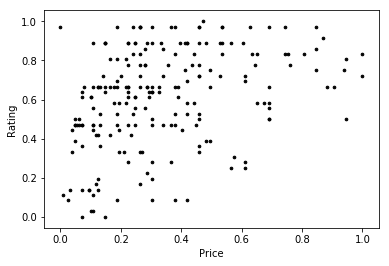

In [180]:
f1 = wk['Price'].values
f2 = wk['Rating'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1,f2,c='black', s=7)
plt.xlabel('Price')
plt.ylabel('Rating')

Text(0, 0.5, 'Rating')

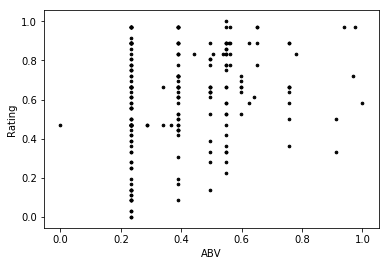

In [181]:
f1 = wk['ABV'].values
f2 = wk['Rating'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1,f2,c='black', s=7)
plt.xlabel('ABV')
plt.ylabel('Rating')

# Use K-means Algorithm

# Workflow 1

In [182]:
def Kmeans(number, attribute):
    k = KMeans(n_clusters=number)
    #k.fit(wk.drop('Rating',axis=1))
    k.fit(wk[[attribute, 'Rating']])
    print('Centroid =',k.cluster_centers_)
    k.labels_
    plt.scatter(wk[attribute].values,wk['Rating'].values, c=k.labels_, cmap='rainbow')
    plt.scatter(k.cluster_centers_[:,0] ,k.cluster_centers_[:,1], marker='*', c='black', s=150)
    plt.xlabel(attribute)
    plt.ylabel('Rating')
    
    return k.labels_

Centroid = [[0.21406728 0.42889908]
 [0.47043624 0.80528322]]
cluser group: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0
 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


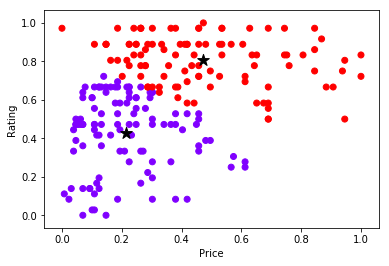

In [183]:
k2price = Kmeans(2,'Price')
print("cluser group:",k2price)

Centroid = [[0.2803876  0.7525    ]
 [0.72215422 0.77704678]
 [0.21694807 0.33028919]]
cluster group: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 1 2 2
 0 2 0 0 2 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0]


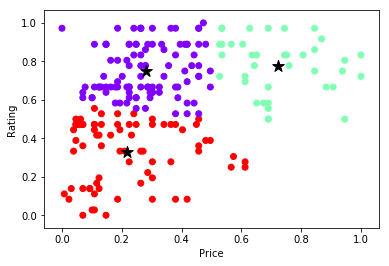

In [184]:
k3price = Kmeans(3,'Price')
print("cluster group:",k3price)

Centroid = [[0.76394099 0.75358423]
 [0.24826078 0.20797721]
 [0.34396099 0.85439068]
 [0.21047984 0.5625879 ]]
cluster group: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 0 0 3 3
 3 3 3 3 3 3 0 3 3 3 0 3 0 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 0 3 3
 3 3 3 3 3 3 3 2 3 2 3 3 0 3 3 3 0 2 3 0 0 2 2 2 3 2 2 0 3 2 0 2 0 2 0 2 2
 2 2 2 0 2 2 0 2 2 0 0 2 0 0 0 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 2 0 2 2 0 0 2 0 2 2 2 2 2 2 2 2 2 2]


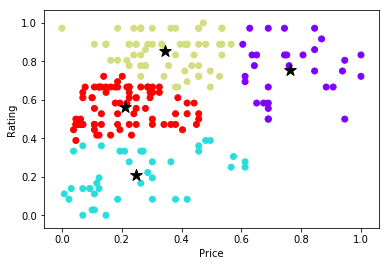

In [185]:
k4price = Kmeans(4,"Price")
print("cluster group:",k4price)

Centroid = [[0.32051282 0.34508547]
 [0.45377898 0.76670844]]
cluster group: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1
 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


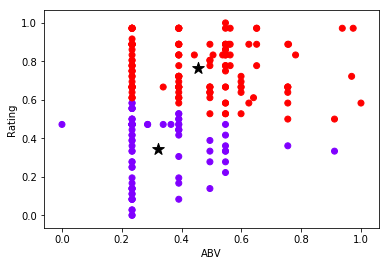

In [186]:
k2abv = Kmeans(2,"ABV")
print("cluster group:",k2abv)

Centroid = [[0.29895833 0.76555556]
 [0.30985809 0.32407407]
 [0.62015703 0.73300166]]
cluster group: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 2
 2 2 1 1 0 0 0 0 2 0 2 2 2 0 2 0 0 0 0 0 0 2 0 2 2 0 2 0 2 2 2 2 0 0 0 0 0
 0 0 2 0 0 2 0 2 0 2 2 0 0 2 2 2 2 0 0 2 0 0 0 0 2 0 0 2 0 0 0 2 0 2 2 0 0
 2 0 2 0 2 0 0 2 2 2 0 2 2 0 0 2 2 0 0 2 2 0 2 2 2 2 2 2 2 0 0 2 0 0 0 2 0
 0 0 0 0 2 0 2 0 0 0 0 2 2 2 0 0 0 0 0 0 2 0 0 2 2 2]


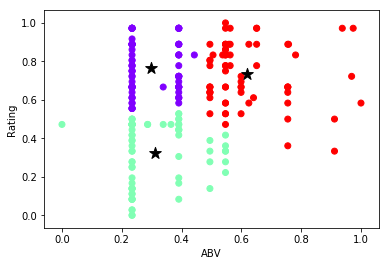

In [187]:
k3abv = Kmeans(3,"ABV")
print("cluster group:",k3abv)

Centroid = [[0.30004529 0.85084541]
 [0.32169118 0.18464052]
 [0.62321314 0.74017094]
 [0.30460859 0.53577441]]
cluster group: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 3 1 2
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 3 2 2
 3 2 3 3 3 3 3 3 2 3 2 2 2 3 2 3 3 3 3 3 3 2 3 2 2 3 2 3 2 2 2 2 3 3 3 3 3
 3 3 2 3 3 2 3 2 3 2 2 3 3 2 2 2 2 3 0 2 0 0 0 0 2 0 0 2 0 0 0 2 0 2 2 0 0
 2 0 2 0 2 0 0 2 2 2 0 2 2 0 0 2 2 0 0 2 2 0 2 2 2 2 2 2 2 0 0 2 0 0 0 2 0
 0 0 0 0 2 0 2 0 0 0 0 2 2 2 0 0 0 0 0 0 2 0 0 2 2 2]


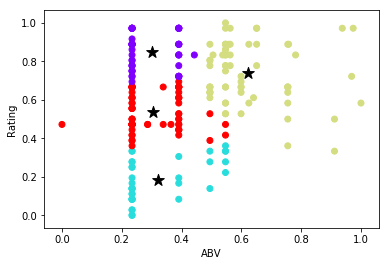

In [188]:
k4abv = Kmeans(4,"ABV")
print("cluster group:",k4abv)

# Use Elbow Method for selecting the optimal number of cluster

In [189]:
def elbow_method(attribute):
    Sum_of_squared_distances = []
    K = range(1,15)
    for k in K:
        km = KMeans(n_clusters=k)
        km.fit(wk[[attribute, 'Rating']])
        Sum_of_squared_distances.append(km.inertia_)
        
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()


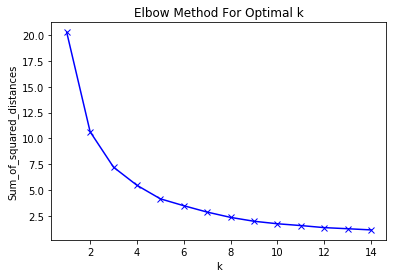

In [190]:
elbow_method('ABV')

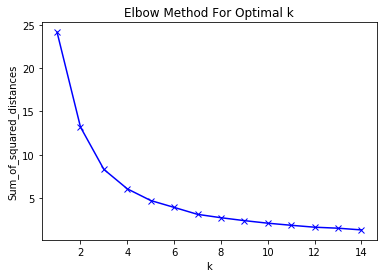

In [191]:
elbow_method('Price')

In [192]:
"""
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(wk.drop('Rating',axis=1))
    Sum_of_squared_distances.append(km.inertia_)"""

"\nSum_of_squared_distances = []\nK = range(1,15)\nfor k in K:\n    km = KMeans(n_clusters=k)\n    km = km.fit(wk.drop('Rating',axis=1))\n    Sum_of_squared_distances.append(km.inertia_)"

In [193]:
"""plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()"""

"plt.plot(K, Sum_of_squared_distances, 'bx-')\nplt.xlabel('k')\nplt.ylabel('Sum_of_squared_distances')\nplt.title('Elbow Method For Optimal k')\nplt.show()"

# The best number of cluster is 3

# Workflow 2

In [194]:
label = np.array(['low' if d <= 1/3  else 'medium' if d <= 2/3 else 'high' for d in data[:,0]]) # Convert rating to low medium high

In [195]:
def compare_group_label(group,label):
    num_group = len(set(group))
    
    idx_low = [i for i, x in enumerate(label) if x == 'low']
    idx_med = [i for i, x in enumerate(label) if x == 'medium']
    idx_high = [i for i, x in enumerate(label) if x == 'high']
    
    size_group = list()
    for i in range(num_group):
        size_group.append(len([j for j in group if j == i]))
    
    percent = list()
    for i in range(num_group):
        tmp = [0,0,0]
        tmp[0] = len([j for j, x in enumerate(group) if x == i and j in idx_low]) / size_group[i] * 100
        tmp[1] = len([j for j, x in enumerate(group) if x == i and j in idx_med]) / size_group[i] * 100
        tmp[2] = len([j for j, x in enumerate(group) if x == i and j in idx_high]) / size_group[i] * 100
        percent.append(tmp)
    return percent

# Show percent price compare with rating(low,medium,high) in each cluster

In [196]:
data_price = np.array(compare_group_label(k3price, label))
df_price = pd.DataFrame({'Low':data_price[:,0],'Medium':data_price[:,1],'High':data_price[:,2]})
df_price.rename(index={0:'Cluster 0',1:'Cluster 1',2:'Cluster 2'},inplace=True)
df_price

,Low,Medium,High
Cluster 0,0.000000,45.000000,55.000000
Cluster 1,0.000000,26.315789,73.684211
Cluster 2,38.356164,61.643836,0.000000


# Show percent abv compare with rating(low,medium,high) in each cluster 

In [197]:
data_abv = np.array(compare_group_label(k3abv, label))
df_abv = pd.DataFrame({'Low':data_abv[:,0],'Medium':data_abv[:,1],'High':data_abv[:,2]})
df_abv.rename(index={0:'Cluster 0',1:'Cluster 1',2:'Cluster 2'},inplace=True)
df_abv

,Low,Medium,High
Cluster 0,0.00000,37.333333,62.666667
Cluster 1,40.57971,59.420290,0.000000
Cluster 2,0.00000,46.268657,53.731343
